# Data Preparation

```
CPSC6300-001 Applied Data Science
Xizhou Feng
Clemson University
```

In this notebook, we show how to use python to prepare a dataset for further data modeling and analysis. Particular, this notebook demonstrates how to perform the following data clearning tasks.

+ Adding an index fields
+ Changing misleading fields
+ Representing categorial data as numerical data
+ Standardizing the numeric fields
+ Identifying outliers

## Step 0: Get the Dataset

In this notebook, we use the Bank Marketing Dataset provided in the UCI Machine Learning Repositoyr. You can manually download the data or use the functions in the scripts datautil.py to download the adtasets. 

### Create a Project Folder

In [1]:
import os

PROJECT_NAME = "bank"
SUB_DIRS = ["data", "src", "model", "notebooks"]

home_dir = os.path.expanduser("~")
course_id = 'cpsc6300'

project_dir = os.path.join(home_dir, course_id, PROJECT_NAME)
for sub_dir in SUB_DIRS:
    sub_dir_path = os.path.join(project_dir, sub_dir)
    if not os.path.exists(sub_dir_path):
        os.makedirs(sub_dir_path)
os.chdir(project_dir)

In [2]:
# verify all sub dirs are created
import numpy as np
assert np.all([os.path.exists(os.path.join(project_dir, sub_dir)) for sub_dir in SUB_DIRS])

### Create the datautil Module

In [3]:
%%writefile src/datautil.py
import os
import zipfile
import requests

def download(url, filepath):
    r = requests.get(url)
    with open(filepath, "wb") as f:
        f.write(r.content)
        
def unzip(zip_file, out_path):
    zf = zipfile.ZipFile(zip_file, "r")
    if not os.path.exists(out_path):
        os.mkdir(out_path)
    for fn in zf.namelist():
        fp = out_path + "/" + fn.replace("/", "-")
        data = zf.read(fn)
        with open(fp, "wb") as f:
            f.write(data)

Overwriting src/datautil.py



### Download some dataset

In [4]:
# add the projet source folder to Python module search path

import sys
sys.path.append(os.path.join(project_dir, "src"))

from datautil import download, unzip

data_dir = os.path.join(project_dir, "data")
for data_file in ["bank.zip", "bank-additional.zip"]:
    data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/{}".format(data_file)
    target_file_path = os.path.join(data_dir, data_file)
    target_data_dir = os.path.join(data_dir, "bank")

    # download data file
    download(data_url, target_file_path)

    # unzip data file
    unzip(target_file_path, target_data_dir)

In [5]:
assert os.path.exists(os.path.join(data_dir, "bank", "bank.csv"))
assert os.path.exists(os.path.join(data_dir, "bank", "bank-full.csv"))

## Step 2. Clean the Data

In [6]:
### Import the necessary libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

The above IPython magic functions sets the backend of matplotlib to the 'inline' backend. 

With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

### Read the data from a text file into a DataFrame

In [7]:
project_data_dir = os.path.join(project_dir, "data", "bank")
data_file_path = os.path.join(project_data_dir, "bank-additional-bank-additional-full.csv")
df = pd.read_csv(data_file_path, sep=";")

### Check the data columns and data sizes

In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
df.shape

(41188, 21)

## Task 1: Add an Index Field

An index field assigns a unique key to each row of the data. With an index, it is easy to refer a specific data sample even the dataset has been rearranged during the data clearning process.

### Create an index field

In [10]:
df['index'] = pd.Series(range(0,df.shape[0]))

### Rearrange the Columns

We arrange the column names to put the index filed at the first column. Not this step is just to demonstrate how to arrange the columns in a data frame and is not necessary since the set_index() method will replace existig index using the values from the "index" column.

In [11]:
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

df.head()

,index,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Replace current index with a new field

Note the parameter `inplace=True` will modify the DataFrame in place and does not create a new object.

In [12]:
df.set_index('index', inplace=True)

In [13]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
index,,,,,,,,,,,,,,,,,,,,,
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Task 2: Change Misleading Field Values

We can plot columns of the DataFrame object to visually examine whether the dataset contains some abnormal or missleading values.

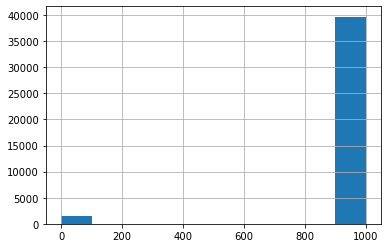

In [14]:
hist = df['pdays'].hist(bins=10)

 The above histogram looks abnormal. From the attribution description of the bank data `bank-additional-bank-additional-names.txt`, we found the following paragraph:
 
 ```
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, 999 means client was not previously contacted)
 ```
 
 Thus, we need to change these misleading values. One method is to change the value `999` to `np.NaN`.

In [15]:
df['pdays'] = df['pdays'].replace({999: np.NaN})

In [16]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
index,,,,,,,,,,,,,,,,,,,,,
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


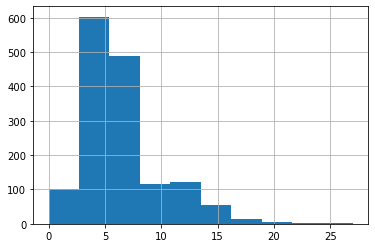

In [17]:
hist = df['pdays'].hist(bins=10)

## Task 3: Representing Categorial Data as Numerical Data

A categorial variable takes on a set of limited set of possible values. Categorical data can either have an order have no order . https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html


### Check the data types of the columns in the DataFrame

In [18]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

### Find the possible values of a given field

In [19]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [20]:
edu_array = df['education'].values

In [21]:
np.unique(edu_array, return_counts=True)

(array(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
        'professional.course', 'university.degree', 'unknown'],
       dtype=object),
 array([ 4176,  2292,  6045,  9515,    18,  5243, 12168,  1731]))

### Change the data type of a field to category

In [22]:
df = df.astype({"education": "category", "job": "category", "marital": "category", "default": "category"})

In [23]:
df.dtypes

age                  int64
job               category
marital           category
education         category
default           category
housing             object
loan                object
contact             object
month               object
day_of_week         object
duration             int64
campaign             int64
pdays              float64
previous             int64
poutcome            object
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                   object
dtype: object

In [24]:
df.dtypes["education"]

CategoricalDtype(categories=['basic.4y', 'basic.6y', 'basic.9y', 'high.school',
                  'illiterate', 'professional.course', 'university.degree',
                  'unknown'],
                 ordered=False)

In [25]:
df.dtypes["job"]

CategoricalDtype(categories=['admin.', 'blue-collar', 'entrepreneur', 'housemaid',
                  'management', 'retired', 'self-employed', 'services',
                  'student', 'technician', 'unemployed', 'unknown'],
                 ordered=False)

### Create a new column "education_numeric" with `category` data type.

In [26]:
edu_map = {
     'illiterate': 0,
     'basic.4y': 4,
     'basic.6y': 6,
     'basic.9y': 9,
     'high.school': 12,
     'professional.course': 12,
     'university.degree': 16,
     'unknown': np.NaN,
}

In [27]:
df['education_numeric'] = df['education'].map(edu_map)

In [28]:
df[["education", "education_numeric"]].head()

,education,education_numeric
index,,
0,basic.4y,4.0
1,high.school,12.0
2,high.school,12.0
3,basic.6y,6.0
4,high.school,12.0


In [29]:
df = df.astype({'education_numeric': "category"})

In [30]:
df.dtypes['education_numeric']

CategoricalDtype(categories=[0.0, 4.0, 6.0, 9.0, 12.0, 16.0], ordered=False)

In [31]:
cat_type = pd.api.types.CategoricalDtype(categories=[0, 4, 6, 9, 12, 16], ordered=True)

In [32]:
df = df.astype({"education_numeric": cat_type})

In [33]:
df.dtypes['education_numeric']

CategoricalDtype(categories=[0, 4, 6, 9, 12, 16], ordered=True)

In [34]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,education_numeric
index,,,,,,,,,,,,,,,,,,,,,
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,12
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,12
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,6
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,12


### Get the list of categories.

In [35]:
df["education_numeric"].cat.categories

Int64Index([0, 4, 6, 9, 12, 16], dtype='int64')

In [36]:
df["education_numeric"].unique().tolist()

[4, 12, 6, 9, nan, 16, 0]

In [37]:
edu_map_reverse = {0: 'illiterate',
                   4: 'basic.4y',
                   6: 'basic.6y',
                   9: 'basic.9y',
                   12: 'high.school',
                   16: 'university.degree',
                   np.nan: 'unknown'}

In [38]:
print(edu_map, '\n', edu_map_reverse)

{'illiterate': 0, 'basic.4y': 4, 'basic.6y': 6, 'basic.9y': 9, 'high.school': 12, 'professional.course': 12, 'university.degree': 16, 'unknown': nan} 
 {0: 'illiterate', 4: 'basic.4y', 6: 'basic.6y', 9: 'basic.9y', 12: 'high.school', 16: 'university.degree', nan: 'unknown'}


In [39]:
df[['education', 'education_numeric']].head()

,education,education_numeric
index,,
0,basic.4y,4
1,high.school,12
2,high.school,12
3,basic.6y,6
4,high.school,12


### Count categorical data

In [40]:
df['education_numeric'].value_counts()

12    14758
16    12168
9      6045
4      4176
6      2292
0        18
Name: education_numeric, dtype: int64

In [41]:
df['education_numeric'].value_counts(normalize=True)

12    0.374027
16    0.308386
9     0.153205
4     0.105837
6     0.058089
0     0.000456
Name: education_numeric, dtype: float64

### Plot Categorical data

In [42]:
df_edu = pd.DataFrame({'count': df['education_numeric'].value_counts(),
                       'proportion': df['education_numeric'].value_counts(normalize=True),  
                       'label': edu_map_reverse})

In [43]:
df_edu = df_edu.dropna()

In [44]:
df_edu

,count,proportion,label
0.0,18.0,0.000456,illiterate
4.0,4176.0,0.105837,basic.4y
6.0,2292.0,0.058089,basic.6y
9.0,6045.0,0.153205,basic.9y
12.0,14758.0,0.374027,high.school
16.0,12168.0,0.308386,university.degree


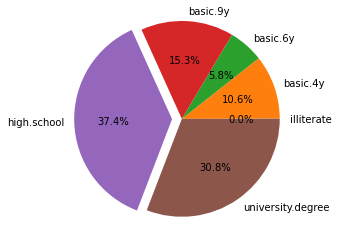

In [45]:
import matplotlib.pyplot as plt

explode = np.zeros(df_edu.shape[0])
explode[4] = 0.1

fig1, ax1 = plt.subplots()
ax1.pie(df_edu['count'], explode=explode, labels=df_edu['label'], autopct="%1.1f%%", shadow=False, startangle=0)

ax1.axis('equal')
plt.show()

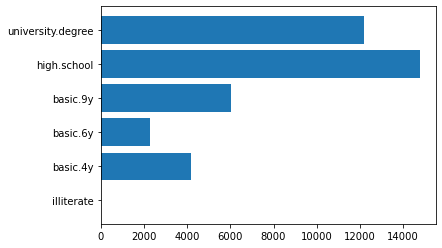

In [46]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
y_pos = np.arange(df_edu.shape[0])
ax1.barh(y_pos, df_edu['count'])
ax1.set_yticks(y_pos)
ax1.set_yticklabels(df_edu['label'])
plt.show()


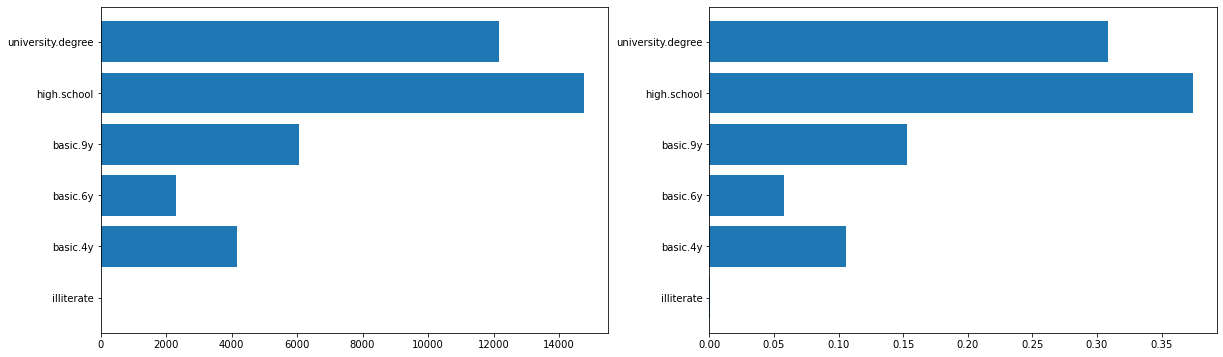

In [47]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(20,6))
y_pos = np.arange(df_edu.shape[0])

ax[0].barh(y_pos, df_edu['count'])
ax[0].set_yticks(y_pos)
ax[0].set_yticklabels(df_edu['label'])

ax[1].barh(y_pos, df_edu['proportion'])
ax[1].set_yticks(y_pos)
ax[1].set_yticklabels(df_edu['label'])

plt.show()

## Task 4: Standardize the Numeric Fileds

We replace the age field with a z-score defined as:

$z = \frac{x-\bar{x}}{s}$

In [48]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,education_numeric
index,,,,,,,,,,,,,,,,,,,,,
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,12
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,12
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,6
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,12


In [49]:
from scipy import stats

In [50]:
df['age_z'] = stats.zscore(df['age'])

In [51]:
df[['age', 'age_z']].head()

,age,age_z
index,,
0,56,1.533034
1,57,1.628993
2,37,-0.290186
3,40,-0.002309
4,56,1.533034


## Task 5: Identify Outliers

In [52]:
bank_outliers = df.query('age_z > 3 | age_z < -3')

In [53]:
bank_outliers.count()['age_z']

369

In [54]:
bank_sort = df.sort_values(['age_z'], ascending=False)

In [55]:
bank_sort

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,education_numeric,age_z
index,,,,,,,,,,,,,,,,,,,,,
38452,98,retired,married,basic.4y,unknown,yes,no,cellular,oct,fri,...,2,success,-3.4,92.431,-26.9,0.730,5017.5,yes,4,5.563310
38455,98,retired,married,basic.4y,unknown,yes,no,cellular,oct,fri,...,0,nonexistent,-3.4,92.431,-26.9,0.730,5017.5,yes,4,5.563310
27826,95,retired,divorced,basic.6y,no,no,no,cellular,mar,thu,...,0,nonexistent,-1.8,92.843,-50.0,1.650,5099.1,no,6,5.275433
38921,94,retired,married,basic.9y,no,no,no,cellular,nov,wed,...,1,failure,-3.4,92.649,-30.1,0.716,5017.5,no,9,5.179474
39655,92,retired,married,unknown,no,yes,no,cellular,may,thu,...,2,success,-1.8,93.876,-40.0,0.683,5008.7,no,NaN,4.987556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37579,17,student,single,basic.9y,no,unknown,unknown,cellular,aug,fri,...,1,failure,-2.9,92.201,-31.4,0.869,5076.2,yes,9,-2.209365
37539,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,...,2,failure,-2.9,92.201,-31.4,0.869,5076.2,no,9,-2.209365
38274,17,student,single,unknown,no,no,yes,cellular,oct,tue,...,2,success,-3.4,92.431,-26.9,0.742,5017.5,yes,NaN,-2.209365


### Task 6: Save the cleaned data

In [56]:
cleaned_data_file_path = os.path.join(project_data_dir, "bank-cleaned.csv")
df.to_csv(cleaned_data_file_path)

In [57]:
df = pd.read_csv(cleaned_data_file_path)

In [58]:
df.head()

,index,age,job,marital,education,default,housing,loan,contact,month,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,education_numeric,age_z
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4.0,1.533034
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,12.0,1.628993
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,12.0,-0.290186
3,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,6.0,-0.002309
4,4,56,services,married,high.school,no,no,yes,telephone,may,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,12.0,1.533034
